## Problem Statement 
## 5.	Compare two linear and nonlinear models. Tabulate the error metrics such as RMSE, MAE, MAPE, R2 score and plot the graph for training time.


Libraies Required

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Data Set : Iris


Data Preprocessing

In [4]:

# Load the dataset
data = pd.read_csv("../Data/Salary/Salary_Data.csv")

# Extract features and target variable
X = data["YearsExperience"].values.reshape(-1, 1)  # Reshape to a 2D array
y = data["Salary"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Neural Network Design 

In [5]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_train)

# Polynomial Regression Model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_train)

Metrics 

In [6]:
# Function to calculate error metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# Calculate error metrics for linear model
rmse_linear, mae_linear, r2_linear = calculate_metrics(y_train, y_pred_linear)

# Calculate error metrics for polynomial model
rmse_poly, mae_poly, r2_poly = calculate_metrics(y_train, y_pred_poly)

Linear Model:
RMSE: 5205.98
MAE: 4221.05
R2 Score: 0.96

Polynomial Model:
RMSE: 5171.67
MAE: 4304.35
R2 Score: 0.97


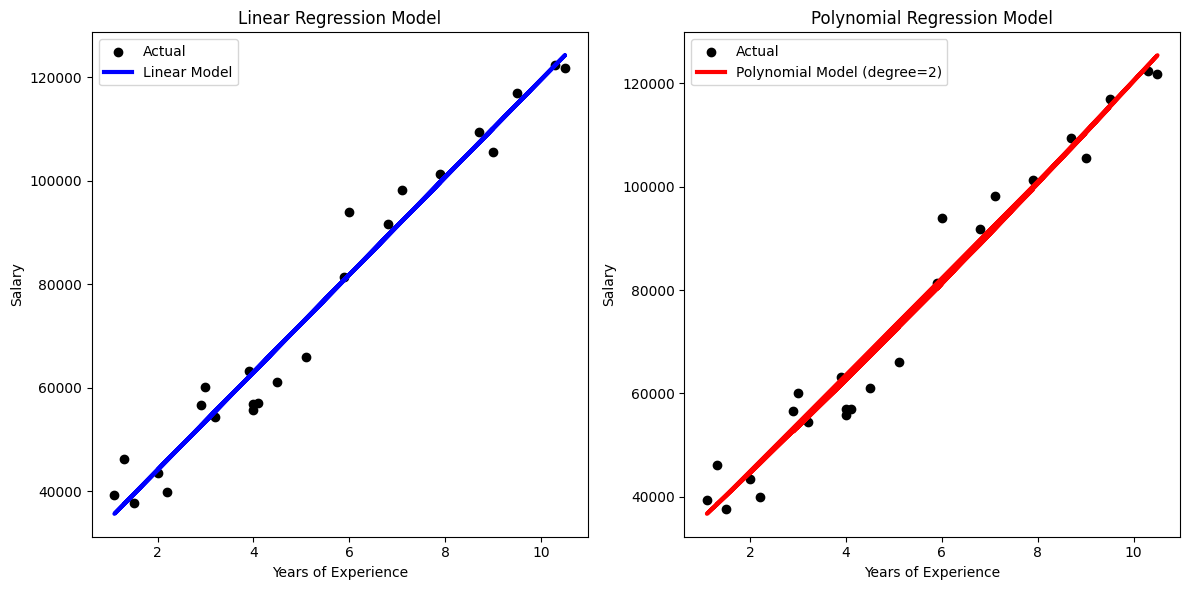

In [7]:

# Print error metrics
print("Linear Model:")
print(f'RMSE: {rmse_linear:.2f}')
print(f'MAE: {mae_linear:.2f}')
print(f'R2 Score: {r2_linear:.2f}')
print("\nPolynomial Model:")
print(f'RMSE: {rmse_poly:.2f}')
print(f'MAE: {mae_poly:.2f}')
print(f'R2 Score: {r2_poly:.2f}')

# Plot the training time graphs
plt.figure(figsize=(12, 6))

# Linear Model
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='black', label='Actual')
plt.plot(X_train, y_pred_linear, color='blue', linewidth=3, label='Linear Model')
plt.title('Linear Regression Model')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Polynomial Model
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='black', label='Actual')
plt.plot(X_train, y_pred_poly, color='red', linewidth=3, label='Polynomial Model (degree=2)')
plt.title('Polynomial Regression Model')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

plt.tight_layout()
plt.show()
